In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle

import sys
sys.path.append('../')
from src.models import evaluate_model, DataSplitDict
from src.feature_engineering import set_types_encoded

# Global: ignore common noisy categories
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=UserWarning)

def reload_modules(m_name):
    import importlib
    imported_module = importlib.import_module(m_name)
    importlib.reload(imported_module)

### Datasets Loading

In [6]:
# Load and preprocess data
original_data = DataSplitDict(
    X_train=set_types_encoded(pd.read_csv('../data/processed/original_X_train.csv')),
    y_train=pd.read_csv('../data/processed/original_y_train.csv').values.ravel(),
    X_test=set_types_encoded(pd.read_csv('../data/processed/original_X_test.csv')),
    y_test=pd.read_csv('../data/processed/original_y_test.csv').values.ravel()  
)

pca_data = DataSplitDict(
    X_train=set_types_encoded(pd.read_csv('../data/processed/PCA/pca_X_train.csv')),
    y_train=pd.read_csv('../data/processed/original_y_train.csv').values.ravel(),
    X_test=set_types_encoded(pd.read_csv('../data/processed/PCA/pca_X_test.csv')),
    y_test=pd.read_csv('../data/processed/original_y_test.csv').values.ravel()
)

mrmr_data = DataSplitDict(
    X_train=set_types_encoded(pd.read_csv('../data/processed/mRMR/mrmr_X_train.csv')),
    y_train=pd.read_csv('../data/processed/original_y_train.csv').values.ravel(),
    X_test=set_types_encoded(pd.read_csv('../data/processed/mRMR/mrmr_X_test.csv')),
    y_test=pd.read_csv('../data/processed/original_y_test.csv').values.ravel()
)

In [6]:

y_train = original_data.oversample_smote().y_train

## Supervised Learning

### 1.  Naive Bayes

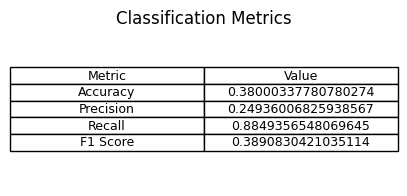

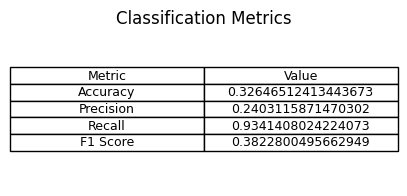

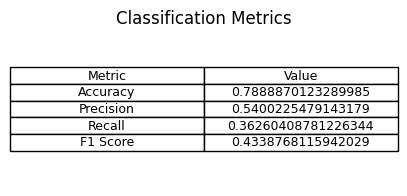

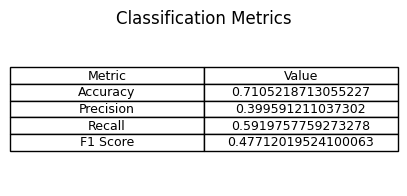

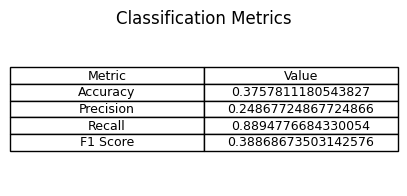

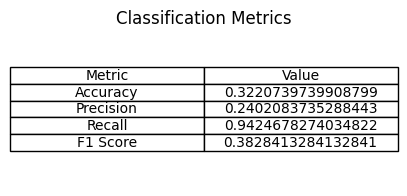

(GaussianNB(),
 {'confusion_matrix': array([[ 662, 3938],
         [  76, 1245]]),
  'classification_report': '              precision    recall  f1-score   support\n\n           0       0.90      0.14      0.25      4600\n           1       0.24      0.94      0.38      1321\n\n    accuracy                           0.32      5921\n   macro avg       0.57      0.54      0.32      5921\nweighted avg       0.75      0.32      0.28      5921\n',
  'actual_default_rate': np.float64(0.2231042053707144),
  'predicted_default_rate': np.float64(0.8753588920790407),
  'roc_curve': {'fpr': array([0.00000000e+00, 0.00000000e+00, 6.52173913e-04, ...,
          9.98260870e-01, 9.98913043e-01, 1.00000000e+00], shape=(1820,)),
   'tpr': array([0.00000000e+00, 7.57002271e-04, 7.57002271e-04, ...,
          1.00000000e+00, 1.00000000e+00, 1.00000000e+00], shape=(1820,)),
   'thresholds': array([            inf, 9.91654536e-001, 9.91167282e-001, ...,
          1.51215846e-231, 2.06510130e-307, 0.000000

In [37]:
reload_modules('src.models')
from src.models import NaiveBayesClassifier

NaiveBayesClassifier(original_data, plotsQ=False)
NaiveBayesClassifier(original_data.oversample_smote(), plotsQ=False)
NaiveBayesClassifier(pca_data, plotsQ=False)
NaiveBayesClassifier(pca_data.oversample_smote(), plotsQ=False)
NaiveBayesClassifier(mrmr_data, plotsQ=False)
NaiveBayesClassifier(mrmr_data.oversample_smote(), plotsQ=False)
# Uncomment to save plots
# results = NaiveBayesClassifier(mrmr_data, plotsQ=True, save_path='../plots/models/NaiveBayes/mRMR')

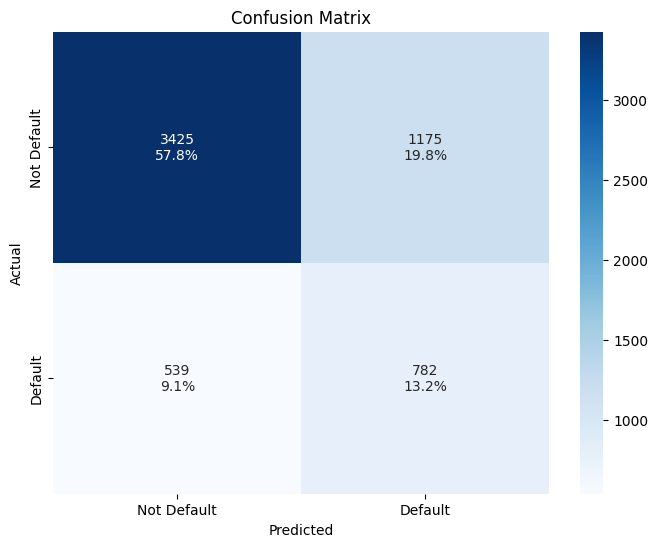

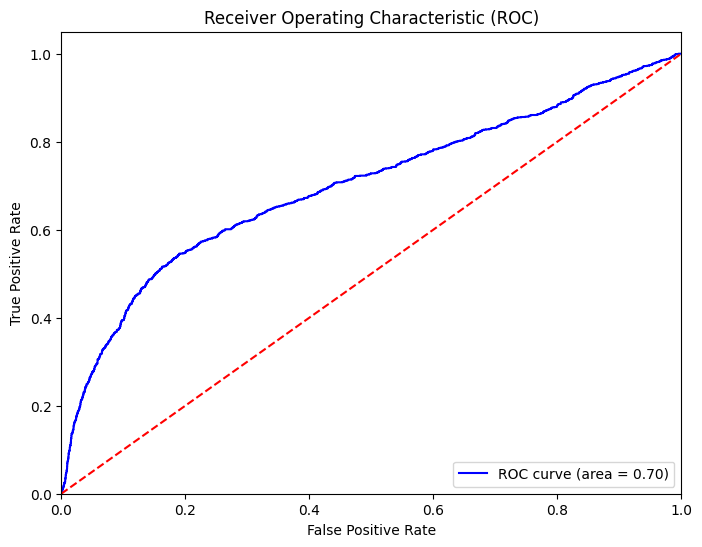

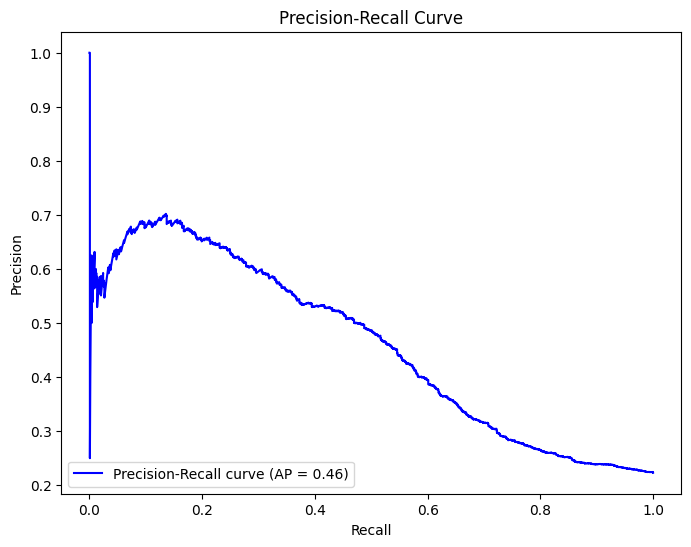

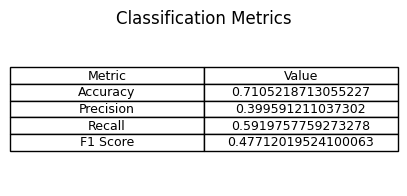

Naive Bayes results: (GaussianNB(), {'confusion_matrix': array([[3425, 1175],
       [ 539,  782]]), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.86      0.74      0.80      4600\n           1       0.40      0.59      0.48      1321\n\n    accuracy                           0.71      5921\n   macro avg       0.63      0.67      0.64      5921\nweighted avg       0.76      0.71      0.73      5921\n', 'actual_default_rate': np.float64(0.2231042053707144), 'predicted_default_rate': np.float64(0.33051849349772), 'roc_curve': {'fpr': array([0.00000000e+00, 0.00000000e+00, 6.52173913e-04, ...,
       9.95217391e-01, 9.95217391e-01, 1.00000000e+00], shape=(1747,)), 'tpr': array([0.00000000e+00, 7.57002271e-04, 7.57002271e-04, ...,
       9.99242998e-01, 1.00000000e+00, 1.00000000e+00], shape=(1747,)), 'thresholds': array([            inf, 1.00000000e+000, 1.00000000e+000, ...,
       2.90974907e-058, 1.48518550e-058, 1.16893139e-107

In [44]:
results_NB_pca_smote = NaiveBayesClassifier(pca_data.oversample_smote(), plotsQ=True, save_path='../plots/models/NaiveBayes/best_model' )
print("Naive Bayes results:", results_NB_pca_smote)


### 2. KNN

Best n_neighbors: 2
Best cross-validated F1 score: 0.1700529793127177


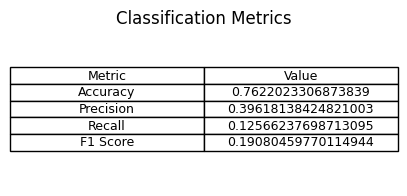

Best n_neighbors: 2
Best cross-validated F1 score: 0.8292175868659536


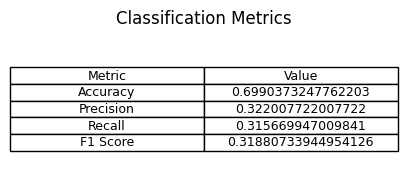

Best n_neighbors: 24
Best cross-validated F1 score: 0.41026780495104653


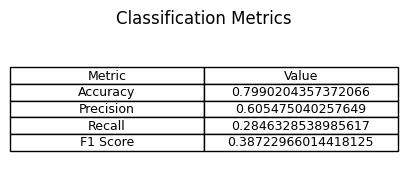

Best n_neighbors: 2
Best cross-validated F1 score: 0.8201414427457037


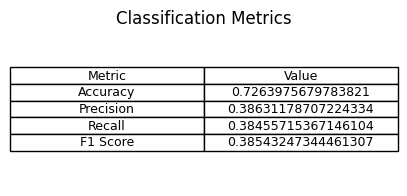

Best n_neighbors: 2
Best cross-validated F1 score: 0.1552645699866711


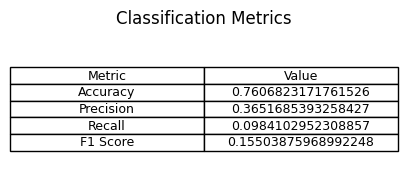

Best n_neighbors: 2
Best cross-validated F1 score: 0.7967626347145631


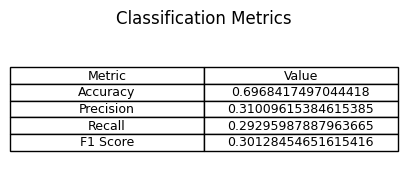

(KNeighborsClassifier(n_neighbors=2),
 {'confusion_matrix': array([[3739,  861],
         [ 934,  387]]),
  'classification_report': '              precision    recall  f1-score   support\n\n           0       0.80      0.81      0.81      4600\n           1       0.31      0.29      0.30      1321\n\n    accuracy                           0.70      5921\n   macro avg       0.56      0.55      0.55      5921\nweighted avg       0.69      0.70      0.69      5921\n',
  'actual_default_rate': np.float64(0.2231042053707144),
  'predicted_default_rate': np.float64(0.21077520689072793),
  'roc_curve': {'fpr': array([0.        , 0.18717391, 0.42978261, 1.        ]),
   'tpr': array([0.        , 0.29295988, 0.5662377 , 1.        ]),
   'thresholds': array([inf, 1. , 0.5, 0. ])},
  'roc_auc': 0.578189612612316,
  'pr_curve': {'precision': array([0.22310421, 0.27449541, 0.31009615, 1.        ]),
   'recall': array([1.        , 0.5662377 , 0.29295988, 0.        ]),
   'thresholds': array([0. , 0

In [43]:
# Apply K-Nearest Neighbors (KNN) for credit card default prediction
reload_modules('src.models')
from src.models import KNNClassifier

param_grid = {'n_neighbors': list(range(2, 40, 2))}

KNNClassifier( original_data, param_grid=param_grid, plotsQ=False)
KNNClassifier( original_data.oversample_smote(), param_grid=param_grid, plotsQ=False)
KNNClassifier( pca_data, param_grid=param_grid, plotsQ=False)
KNNClassifier( pca_data.oversample_smote(), param_grid=param_grid, plotsQ=False)
KNNClassifier( mrmr_data, param_grid=param_grid, plotsQ=False)
KNNClassifier( mrmr_data.oversample_smote(), param_grid=param_grid, plotsQ=False)

## Decision Trees

Best parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validated F1 score: 0.37793408302514264


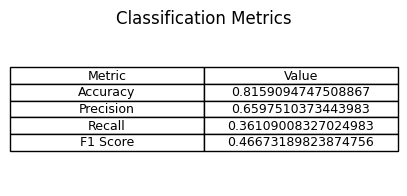

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validated F1 score: 0.7235831304584185


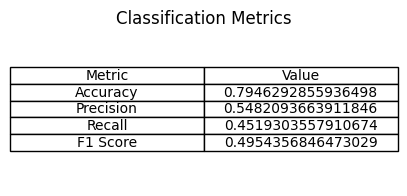

Best parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validated F1 score: 0.38625344026834096


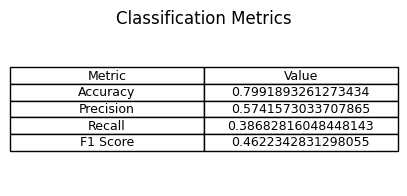

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validated F1 score: 0.6848776989257479


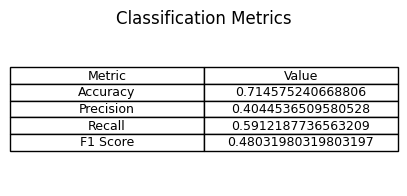

Best parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validated F1 score: 0.383990030389037


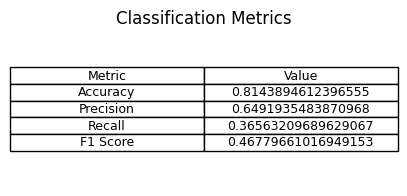

Best parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validated F1 score: 0.6530762287719962


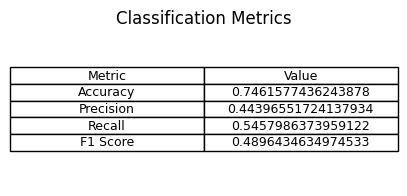

(DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=12345),
 {'confusion_matrix': array([[3697,  903],
         [ 600,  721]]),
  'classification_report': '              precision    recall  f1-score   support\n\n           0       0.86      0.80      0.83      4600\n           1       0.44      0.55      0.49      1321\n\n    accuracy                           0.75      5921\n   macro avg       0.65      0.67      0.66      5921\nweighted avg       0.77      0.75      0.75      5921\n',
  'actual_default_rate': np.float64(0.2231042053707144),
  'predicted_default_rate': np.float64(0.27427799358216515),
  'roc_curve': {'fpr': array([0.        , 0.00782609, 0.00826087, 0.00869565, 0.00913043,
          0.00934783, 0.01021739, 0.01108696, 0.01195652, 0.01217391,
          0.01304348, 0.01391304, 0.01891304, 0.02      , 0.02      ,
          0.02173913, 0.02195652, 0.02478261, 0.02521739, 0.02543478,
          0.02717391, 0.02804348, 0.02826087, 0.02956522, 0.0376087 ,


In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

reload_modules('src.models')
from src.models import DecisionTreeClassifierModel

param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 3, 5, 10]
}

DecisionTreeClassifierModel(original_data, param_grid=param_grid, plotsQ=False)
DecisionTreeClassifierModel(original_data.oversample_smote(), param_grid=param_grid, plotsQ=False)
DecisionTreeClassifierModel(pca_data, param_grid=param_grid, plotsQ=False)
DecisionTreeClassifierModel(pca_data.oversample_smote(), param_grid=param_grid, plotsQ=False)
DecisionTreeClassifierModel(mrmr_data, param_grid=param_grid, plotsQ=False)
DecisionTreeClassifierModel(mrmr_data.oversample_smote(), param_grid=param_grid, plotsQ=False)  


## Random Forests

In [ ]:
reload_modules('src.models')
from src.models import RandomForestClassifierModel

param_grid = {
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5],
            'min_samples_split': [5, 10],
            'min_samples_leaf': [2, 4],
            'criterion': ['gini', 'entropy']
        }

RandomForestClassifierModel(original_data, plotsQ=False, param_grid=param_grid)
RandomForestClassifierModel(original_data.oversample_smote(), plotsQ=False, param_grid=param_grid)
RandomForestClassifierModel(pca_data, plotsQ=False, param_grid=param_grid)
RandomForestClassifierModel(pca_data.oversample_smote(), plotsQ=False, param_grid=param_grid)
RandomForestClassifierModel(mrmr_data, plotsQ=False, param_grid=param_grid)
RandomForestClassifierModel(mrmr_data.oversample_smote(), plotsQ=False, param_grid=param_grid)

KeyboardInterrupt: 

In [30]:
# Apply XGBoost for credit card default prediction
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np

reload_modules('src.models')
from src.models import evaluate_model

def XGBoostClassifier(data, param_grid=None, plotsQ=False, save_path=None):
    """
    Train and evaluate an XGBoost classifier on credit card default data
    
    Parameters:
    -----------
    data : DataSplitDict
        Contains X_train, X_test, y_train, y_test
    param_grid : dict, optional
        Parameters for grid search
    plotsQ : bool
        Whether to generate plots
    save_path : str, optional
        Path to save plots
    
    Returns:
    --------
    dict
        Model evaluation metrics
    """
    # Use default parameters if none provided
    if param_grid is None:
        param_grid = {
            'max_depth': [3, 6, 9],
            'learning_rate': [0.01, 0.05],
            'n_estimators': [10, 20, 50, 75, 100, 125, 150, 200],
            'subsample': [0.5, 0.8, 1.0],
            'colsample_bytree': [0.8, 1.0],
            'gamma': [0, 1, 2, 5],
            'metrics': ['auc', 'error', 'logloss']
        }
    
    print("\n" + "="*50)
    print("XGBoost Classifier")
    print("="*50)
    
    # Create the base model
    xgb_model = xgb.XGBClassifier(
        use_label_encoder=False,
        random_state=42
    )
    
    # Setup grid search
    grid_search = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid,
        scoring='recall',
        cv=3,
        n_jobs=-1,
        verbose=1
    )
    
    # Fit the model
    print("Fitting XGBoost model...")
    grid_search.fit(data.X_train, data.y_train)
    
    # Get best model
    best_model = grid_search.best_estimator_
    print(f"Best parameters: {grid_search.best_params_}")
    
    # Make predictions
    y_pred = best_model.predict(data.X_test)
    y_pred_proba = best_model.predict_proba(data.X_test)[:, 1]
    
    # Evaluate model
    metrics = evaluate_model(model = best_model, data = data)
  
    
    # Generate plots if requested
    if plotsQ:
        # Feature importance plot
        plt.figure(figsize=(12, 8))
        feature_importance = best_model.feature_importances_
        sorted_idx = np.argsort(feature_importance)
        features = data.X_train.columns
        
        plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
        plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
        plt.xlabel('Feature Importance')
        plt.title('XGBoost Feature Importance')
        
        if save_path:
            os.makedirs(save_path, exist_ok=True)
            plt.savefig(f"{save_path}/xgboost_feature_importance.png", dpi=300, bbox_inches='tight')
        plt.show()
        
        # Plot ROC curve
        from sklearn.metrics import roc_curve, auc
        fpr, tpr, _ = roc_curve(data.y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('XGBoost ROC Curve')
        plt.legend(loc="lower right")
        
        if save_path:
            plt.savefig(f"{save_path}/xgboost_roc_curve.png", dpi=300, bbox_inches='tight')
        plt.show()
    
    return metrics

#



Running XGBoost on original data...

XGBoost Classifier
Fitting XGBoost model...
Fitting 3 folds for each of 480 candidates, totalling 1440 fits
Best parameters: {'colsample_bytree': 1.0, 'gamma': 3, 'learning_rate': 0.1, 'max_depth': 3, 'metrics': 'auc', 'n_estimators': 200, 'subsample': 0.8}


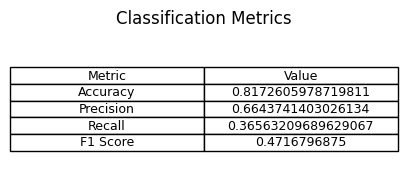


Running XGBoost on original data with SMOTE oversampling...

XGBoost Classifier
Fitting XGBoost model...
Fitting 3 folds for each of 480 candidates, totalling 1440 fits
Best parameters: {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 3, 'metrics': 'auc', 'n_estimators': 10, 'subsample': 1.0}


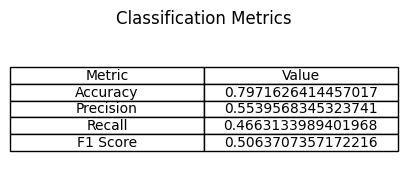


Running XGBoost on PCA data...

XGBoost Classifier
Fitting XGBoost model...
Fitting 3 folds for each of 480 candidates, totalling 1440 fits
Best parameters: {'colsample_bytree': 1.0, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 3, 'metrics': 'auc', 'n_estimators': 100, 'subsample': 0.8}


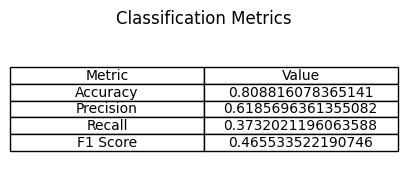


Running XGBoost on PCA data with SMOTE oversampling...

XGBoost Classifier
Fitting XGBoost model...
Fitting 3 folds for each of 480 candidates, totalling 1440 fits
Best parameters: {'colsample_bytree': 1.0, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 6, 'metrics': 'auc', 'n_estimators': 200, 'subsample': 0.8}


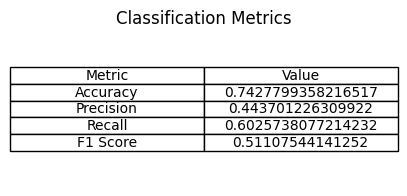


Running XGBoost on mRMR data...

XGBoost Classifier
Fitting XGBoost model...
Fitting 3 folds for each of 480 candidates, totalling 1440 fits
Best parameters: {'colsample_bytree': 1.0, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 3, 'metrics': 'auc', 'n_estimators': 100, 'subsample': 0.8}


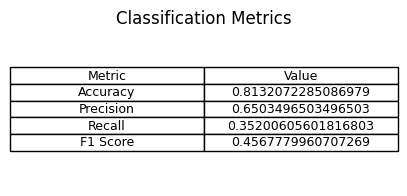


Running XGBoost on mRMR data with SMOTE oversampling...

XGBoost Classifier
Fitting XGBoost model...
Fitting 3 folds for each of 480 candidates, totalling 1440 fits
Best parameters: {'colsample_bytree': 1.0, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 6, 'metrics': 'auc', 'n_estimators': 200, 'subsample': 0.8}


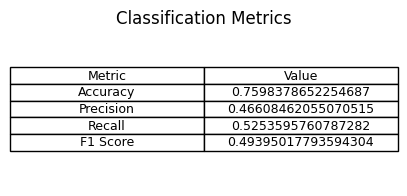

NameError: name 'os' is not defined

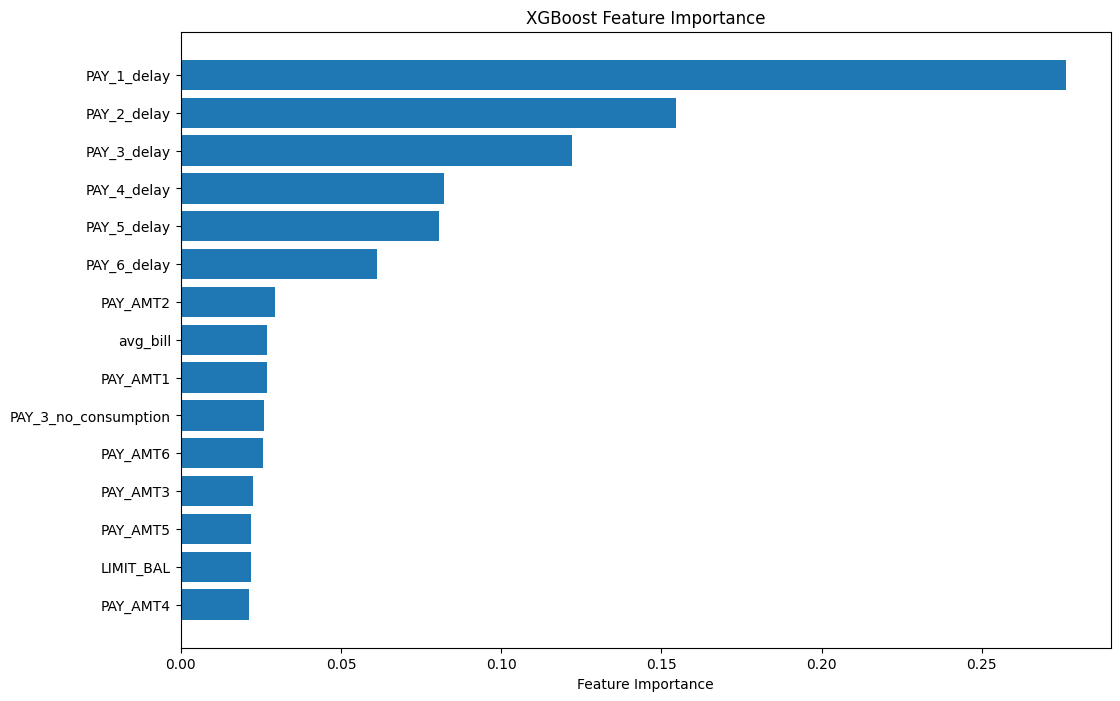

In [35]:

# param_grid = {
#    'max_depth': [3, 6],
#    'learning_rate': [0.1],
#    'n_estimators': [100],
#    'subsample': [0.8],
#    'colsample_bytree': [0.8],
#    'gamma': [0]
# }

param_grid = {
            'max_depth': [3, 6],
            'learning_rate': [0.05, 0.1],
            'n_estimators': [10, 20, 50, 100, 200],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0],
            'gamma': [1, 3],
            'metrics': ['auc', 'error', 'logloss']
        }



# Run XGBoost on all datasets
print("\nRunning XGBoost on original data...")
results_original = XGBoostClassifier(original_data, param_grid=param_grid, plotsQ=False)

print("\nRunning XGBoost on original data with SMOTE oversampling...")
results_original_smote = XGBoostClassifier(original_data.oversample_smote(), param_grid=param_grid, plotsQ=False)

print("\nRunning XGBoost on PCA data...")
results_pca = XGBoostClassifier(pca_data, param_grid=param_grid, plotsQ=False)

print("\nRunning XGBoost on PCA data with SMOTE oversampling...")
results_pca_smote = XGBoostClassifier(pca_data.oversample_smote(), param_grid=param_grid, plotsQ=False)

print("\nRunning XGBoost on mRMR data...")
results_mrmr = XGBoostClassifier(mrmr_data, param_grid=param_grid, plotsQ=False)

print("\nRunning XGBoost on mRMR data with SMOTE oversampling...")
results_mrmr_smote = XGBoostClassifier(mrmr_data.oversample_smote(), param_grid=param_grid, plotsQ=True, 
                                       save_path='../plots/models/XGBoost/mRMR')

# Compare results
results_comparison = pd.DataFrame({
    'Original': results_original,
    'Original+SMOTE': results_original_smote,
    'PCA': results_pca,
    'PCA+SMOTE': results_pca_smote,
    'mRMR': results_mrmr,
    'mRMR+SMOTE': results_mrmr_smote
})

print("\nXGBoost Results Comparison:")
print(results_comparison.T)

# Optional: plot comparison of AUC across different datasets
plt.figure(figsize=(10, 6))
results_comparison.loc['auc'].plot(kind='bar', color='skyblue')
plt.title('XGBoost Performance (AUC) Across Different Datasets')
plt.ylabel('AUC Score')
plt.ylim([0.5, 1.0])
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.savefig('../plots/models/XGBoost/xgboost_comparison.png', dpi=300, bbox_inches='tight')
plt.show()